<a href="https://colab.research.google.com/github/komert-mario/MWIT_POSN_2020/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and install dependecy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
#Print root password
print("Root password: {}".format(password))
#Get public address
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Copy authtoken from https://dashboard.ngrok.com/auth
··········
Root password: pnUEsam8mmIz2nzXWXgw
tcp://2.tcp.ngrok.io:11107


In [ ]:
!pip install opencv-python

In [ ]:
import cv2

# Locate to directory

4/1AFFDMmvkZ-NG6wEghOVEACPuzPRbzLwIA1a1Qg-hHDYOwdJIkcdgjU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shared drives/Hackathon/train

/content/drive/Shared drives/Hackathon/train


In [ ]:
!ls

covid  normal  pneumonia


# Pre processing

In [ ]:
covid_img = []
normal_img = []
pneumonia_img = []

for filename in os.listdir("./covid"):
  img = cv2.imread(os.path.join("./covid/", filename))
  if img is not None:
    covid_img.append(img)

for filename in os.listdir("./normal"):
  img = cv2.imread(os.path.join("./normal/", filename))
  if img is not None:
    normal_img.append(img)

for filename in os.listdir("./pneumonia"):
  img = cv2.imread(os.path.join("./pneumonia/", filename))
  if img is not None:
    pneumonia_img.append(img)

print("Total image")
print("Covid : " + str(len(covid_img)))
print("Normal : " + str(len(normal_img)))
print("Pneumonia : " + str(len(pneumonia_img)))

Total image
Covid : 200
Normal : 230
Pneumonia : 250


In [ ]:
ret, normal_bw_img = cv2.threshold(normal_img[0],100,255,cv2.THRESH_BINARY)

In [ ]:
 edge = cv2.Canny(normal_bw_img, 175, 175)

In [ ]:
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [ ]:
cv2.drawContours(normal_bw_img, contours, -1, (0, 255, 0), 3) 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(normal_bw_img,(x,y),(x+w,y+h),(255,0,0),2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

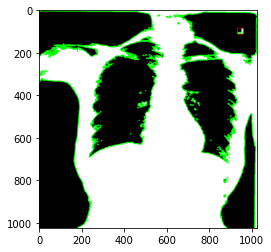

In [ ]:
plt.imshow(normal_bw_img)